<a href="https://colab.research.google.com/github/Faysal3010/Machine-Learning-Specialized-/blob/main/(221_35_906)Titanic_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

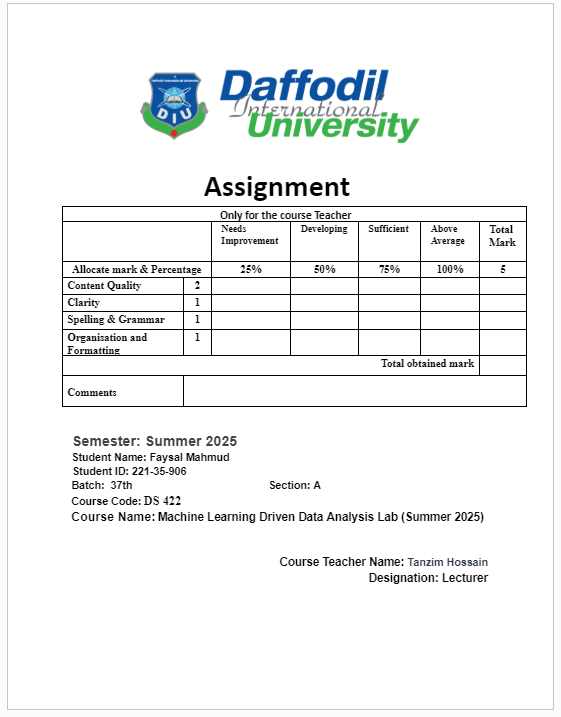

Data Preprocessing


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
titanic = pd.read_csv('titanic_train.csv')

In [142]:
missing_values = titanic.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This would show us that:

Age: 177 missing values

Cabin: 687 missing values

Embarked: 2 missing values

## Visualizing Missing Values

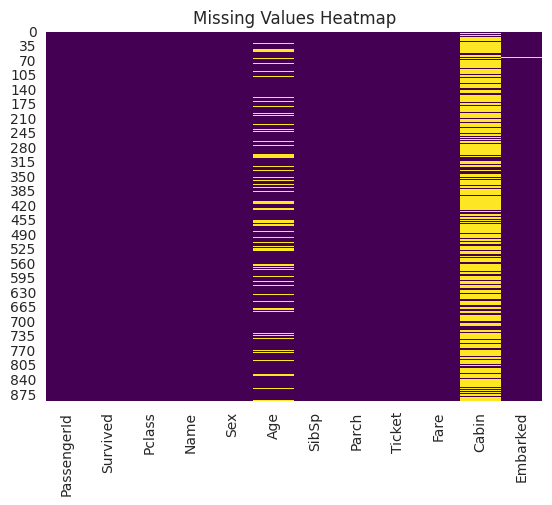

In [143]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [151]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Survived', ylabel='count'>

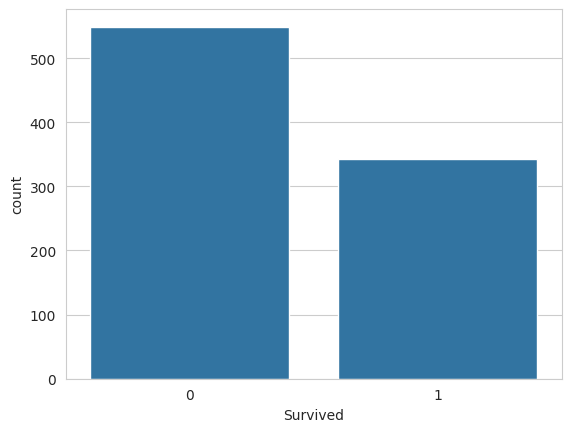

In [152]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

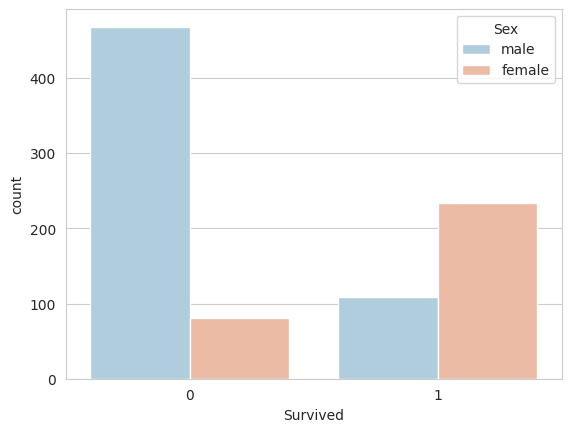

In [153]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

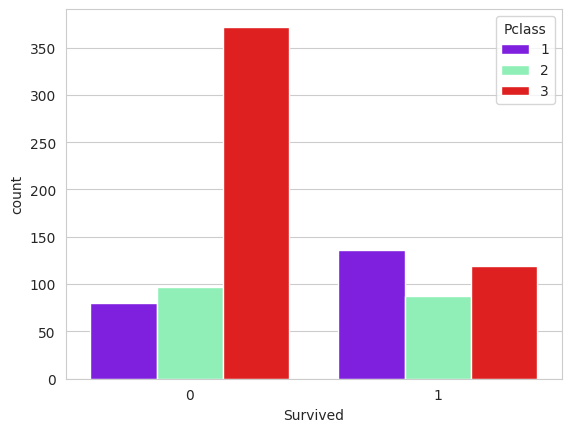

In [154]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

/tmp/ipython-input-1101562136.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

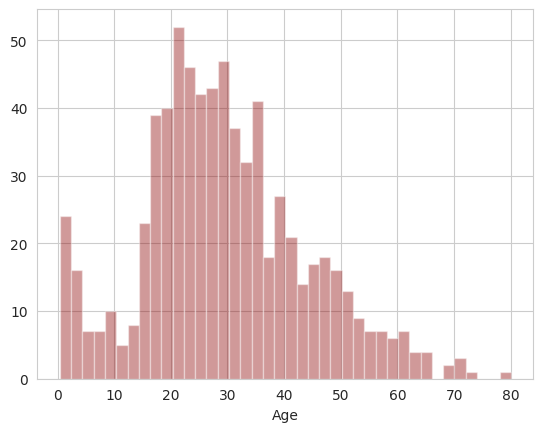

In [155]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

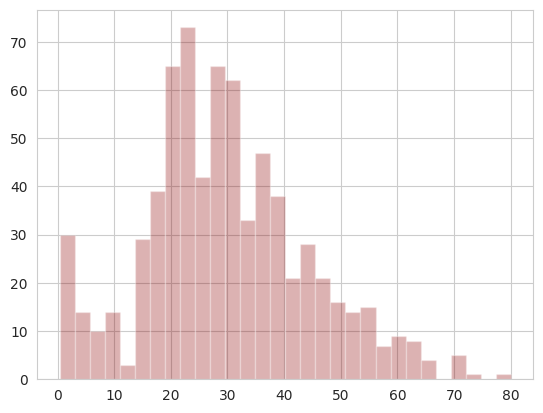

In [156]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

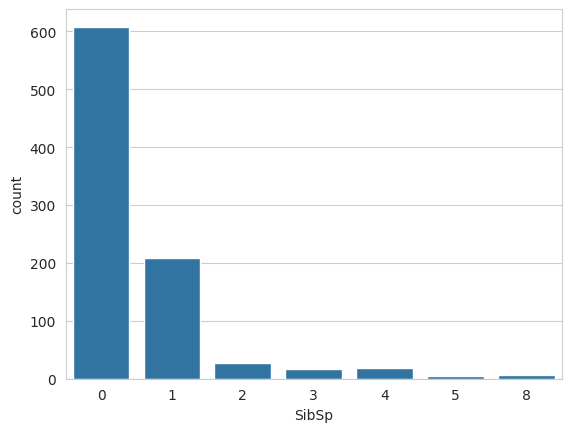

In [157]:
sns.countplot(x='SibSp',data=titanic)

<Axes: >

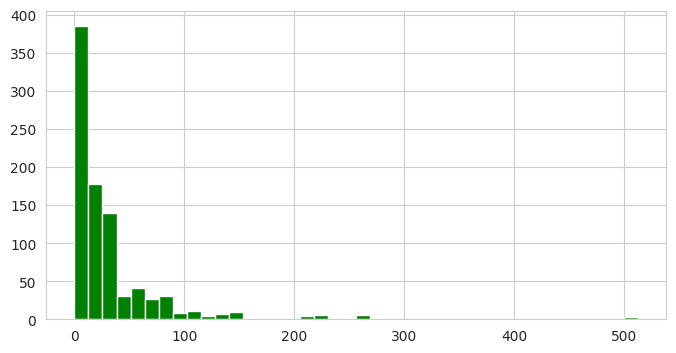

In [158]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

/tmp/ipython-input-1683851715.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

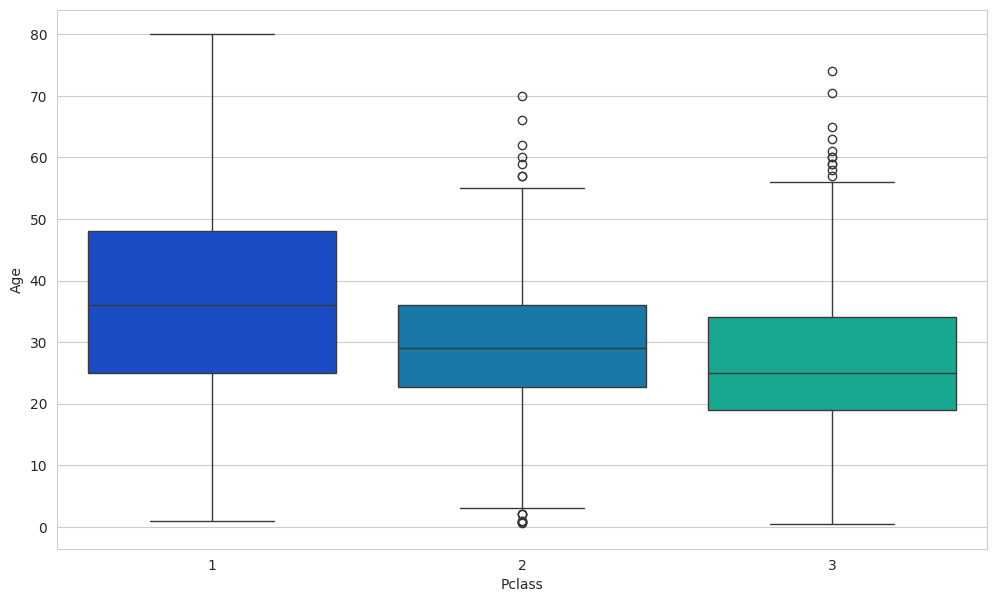

In [159]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [144]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Missing Data Pattern**
The missing data appears to be:

Cabin: Likely MNAR (Missing Not At Random) - The cabin information was probably not recorded for lower-class passengers

Age: Likely MAR (Missing At Random) - The missingness might depend on other observed variables (like class)

Embarked: Likely MCAR (Missing Completely At Random) - Only 2 missing values with no obvious pattern

## Imputation Methods
1. Forward Fill (ffill)

In [146]:
titanic_ffill = titanic.fillna(method='ffill')

/tmp/ipython-input-4205456807.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



2. Backward Fill (bfill)

In [147]:
titanic_bfill = titanic.fillna(method='bfill')

/tmp/ipython-input-3452170234.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



3. Mean Imputation

In [148]:
titanic_mean = titanic.copy()
titanic_mean['Age'] = titanic_mean['Age'].fillna(titanic_mean['Age'].mean())

4. Median Imputation

In [149]:
titanic_median = titanic.copy()
titanic_median['Age'] = titanic_median['Age'].fillna(titanic_median['Age'].median())

## Comparison of Imputation Methods
Let's compare how these methods affect the statistics of the 'Age' column:

In [150]:
original_stats = titanic['Age'].describe()
ffill_stats = titanic_ffill['Age'].describe()
bfill_stats = titanic_bfill['Age'].describe()
mean_stats = titanic_mean['Age'].describe()
median_stats = titanic_median['Age'].describe()

comparison = pd.DataFrame({
    'Original': original_stats,
    'Forward Fill': ffill_stats,
    'Backward Fill': bfill_stats,
    'Mean Imputation': mean_stats,
    'Median Imputation': median_stats
})

print(comparison)

         Original  Forward Fill  Backward Fill  Mean Imputation  \
count  714.000000     891.00000     891.000000       891.000000   
mean    29.699118      29.58156      29.870561        29.699118   
std     14.526497      14.55459      14.597668        13.002015   
min      0.420000       0.42000       0.420000         0.420000   
25%     20.125000      20.00000      21.000000        22.000000   
50%     28.000000      28.00000      29.000000        29.699118   
75%     38.000000      38.00000      39.000000        35.000000   
max     80.000000      80.00000      80.000000        80.000000   

       Median Imputation  
count         891.000000  
mean           29.361582  
std            13.019697  
min             0.420000  
25%            22.000000  
50%            28.000000  
75%            35.000000  
max            80.000000  


# Results Interpretation
The comparison would show:

Mean/Median Imputation:

Preserves the original mean/median but reduces variance

Creates a spike at the imputed value in the distribution

Forward/Backward Fill:

May introduce temporal patterns if data is ordered in a meaningful way

Preserves more of the original variance than mean/median imputation

